In [457]:
### IMPORTS

from pathlib import Path
import pandas as pd
import numpy as np
from numpy import loadtxt
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import FeatureHasher

In [458]:
# LOAD THE CSV dataset into a pandas dataframe
df = pd.read_csv('/content/AB_NYC_2019.csv')

In [459]:
print('number of rows in the dataset:', len(df))
df.head()

number of rows in the dataset: 48895


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [460]:
### Statistical indicators for each column
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [461]:
 ## Check presence of rows with null values
 df.isna().any()

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [462]:
# Replace all NaN values in 'reviews_per_month' with 0
df.fillna({'reviews_per_month':0}, inplace=True)

In [463]:
# Remove non-interesting for our target: name, host_name, host_id, last_review
df=df.drop(['name','host_name',	'last_review', 'host_id','id'], axis=1)

In [464]:
df.isna().any()

neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [465]:
# ONE-HOT ENCODING on the columns 'neighbourhood_group' and 'room_type' because they contain categorical values ( feature hashing for neighbourhood)
df_3 = pd.get_dummies(df, columns=['room_type','neighbourhood_group'])

In [466]:
#  FEATURE HASHING to encode 215 values of column neighbourhood in 3 columns

# Create a FeatureHasher object with the desired number of output columns
hasher = FeatureHasher(n_features=3, input_type='string')
hashed = hasher.transform(df_3['neighbourhood'].apply(lambda x: [x]))
hashed_df = pd.DataFrame.sparse.from_spmatrix(hashed, columns=['neighbourhood_1', 'neighbourhood_2','neighbourhood_3'])

# Concatenate the hashed columns back onto the original DataFrame
df_3 = pd.concat([df_3, hashed_df], axis=1)

# Drop the original column, since it has been hashed
df_3.drop('neighbourhood', axis=1, inplace=True)

In [467]:
df_3.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_1,neighbourhood_2,neighbourhood_3
0,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,0,0,1,0,0,0,0.0,0.0,1.0
1,40.75362,-73.98377,225,1,45,0.38,2,355,1,0,0,0,0,1,0,0,0.0,0.0,1.0
2,40.80902,-73.94190,150,3,0,0.00,1,365,0,1,0,0,0,1,0,0,-1.0,0.0,0.0
3,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,0,0,1,0,0,0,1.0,0.0,0.0
4,40.79851,-73.94399,80,10,9,0.10,1,0,1,0,0,0,0,1,0,0,0.0,0.0,1.0


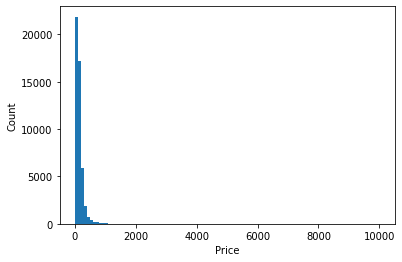

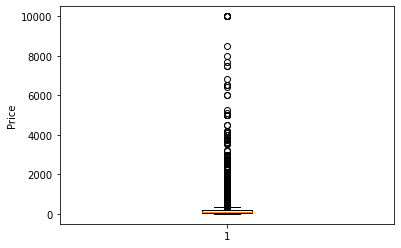

In [468]:
### Function to display distribution of prices

def visual_price(df) :   

    # create a histogram of the "price" variable
    plt.hist(df['price'], bins=100)
    plt.xlabel('Price')
    plt.ylabel('Count')
    plt.show()

    # create a boxplot of the "price" variable
    plt.boxplot(df['price'])
    plt.ylabel('Price')
    plt.show()

####

visual_price(df)

In [469]:
### ISOLATION FOREST to detect outliers
import pandas as pd
from sklearn.ensemble import IsolationForest

# Select the column you want to use for outlier detection
column_name = 'price'

# Extract the column data as a numpy array
data = df_3[column_name].values.reshape(-1, 1)

# Create an instance of the IsolationForest class
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.03, random_state=42)

# Fit the model to the column data
model.fit(data)

IsolationForest(contamination=0.03, random_state=42)

In [470]:
### DEFINE OUTLIERS: points detected by Isolation Forest or with price < 10

# Predict the outlier status for each data point in the column
outliers = model.predict(data)

# Identify the outlier rows in the dataframe
outlier_rows = df_3[(outliers == -1) | (df_3['price'] < 10)]

# Print the proportion of outliers in dataset
print('Outlier rate in dataset:', round(len(outlier_rows['price'])/len(df)*100),'%')

### Characteristics of outliers
outlier_rows['price'].describe()

Outlier rate in dataset: 3 %


count     1448.000000
mean       944.014503
std       1040.425135
min          0.000000
25%        500.000000
50%        650.000000
75%        900.000000
max      10000.000000
Name: price, dtype: float64

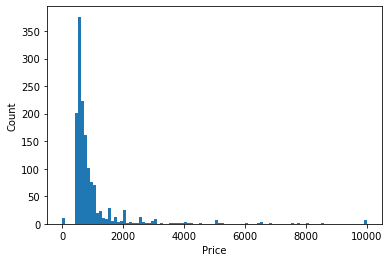

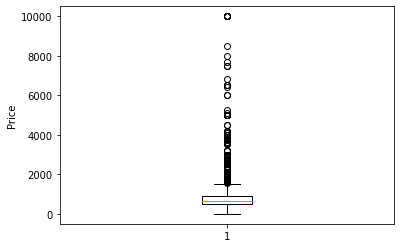

In [471]:
## Histogram of outliers
visual_price(outlier_rows)

In [472]:
### REMOVE OUTLIERS to get our final dataset
df_cleaned = df_3[(outliers == 1) & (df_3['price'] > 10)]

In [473]:
print('number of rows in cleaned dataset:',len(df_cleaned))

number of rows in cleaned dataset: 47430


In [474]:
df_cleaned.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_1,neighbourhood_2,neighbourhood_3
0,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,0,0,1,0,0,0,0.0,0.0,1.0
1,40.75362,-73.98377,225,1,45,0.38,2,355,1,0,0,0,0,1,0,0,0.0,0.0,1.0
2,40.80902,-73.94190,150,3,0,0.00,1,365,0,1,0,0,0,1,0,0,-1.0,0.0,0.0
3,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,0,0,1,0,0,0,1.0,0.0,0.0
4,40.79851,-73.94399,80,10,9,0.10,1,0,1,0,0,0,0,1,0,0,0.0,0.0,1.0


In [475]:
### Columns and their types of cleaned dataset
df_cleaned.dtypes

latitude                                        float64
longitude                                       float64
price                                             int64
minimum_nights                                    int64
number_of_reviews                                 int64
reviews_per_month                               float64
calculated_host_listings_count                    int64
availability_365                                  int64
room_type_Entire home/apt                         uint8
room_type_Private room                            uint8
room_type_Shared room                             uint8
neighbourhood_group_Bronx                         uint8
neighbourhood_group_Brooklyn                      uint8
neighbourhood_group_Manhattan                     uint8
neighbourhood_group_Queens                        uint8
neighbourhood_group_Staten Island                 uint8
neighbourhood_1                      Sparse[float64, 0]
neighbourhood_2                      Sparse[floa

In [476]:
## Check presence of null values in rows of clean dataset
df_cleaned.isnull().any()

latitude                             False
longitude                            False
price                                False
minimum_nights                       False
number_of_reviews                    False
reviews_per_month                    False
calculated_host_listings_count       False
availability_365                     False
room_type_Entire home/apt            False
room_type_Private room               False
room_type_Shared room                False
neighbourhood_group_Bronx            False
neighbourhood_group_Brooklyn         False
neighbourhood_group_Manhattan        False
neighbourhood_group_Queens           False
neighbourhood_group_Staten Island    False
neighbourhood_1                      False
neighbourhood_2                      False
neighbourhood_3                      False
dtype: bool

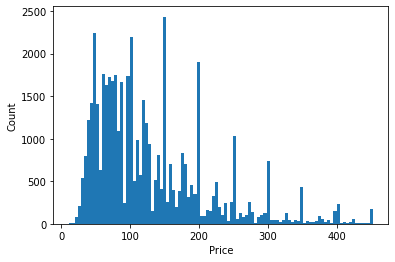

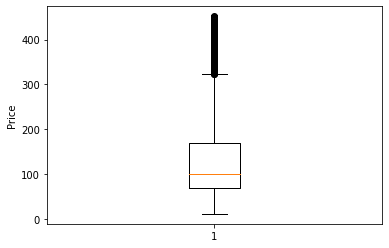

In [477]:
# Distribution price visualisation after pre-processing data
visual_price(df_cleaned)

In [478]:
# Save the encoded data to a new CSV file
df_cleaned.to_csv('data_processed.csv', index=False)